In [12]:
import pandas as pd
import matplotlib as plt

df = pd.read_csv("train.csv")
pd.set_option('display.max_columns', None)
print(df.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [13]:
df.shape

(891, 12)

A base contém 891 registros, que são os passageiros, e 12 variaveis, que são os informações deles.

In [14]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Usamos o df.head() para verificar como os dados estão organizados 

In [6]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
Usamos o df.isnull().sum() para saber quais valores estão faltando e sormarmos eles de acordo com a sua coluna.A falta de informação grande de idade e cabines prejudica um pouco a analise na hora de saber a
faixa de idade dos sobreviventes e suas cabines.

Após a análise da estrutura da base, foram selecionadas as variáveis mais relevantes para o estudo da sobrevivência, como sexo, classe, idade, valor da passagem e porto de embarque. Colunas como PassengerId, Name, Ticket e Cabin não foram utilizadas por não contribuírem diretamente para o objetivo da análise ou por apresentarem grande quantidade de valores ausentes.

In [15]:
df["Survived"].mean()

np.float64(0.3838383838383838)

In [16]:
df["Survived"].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [17]:
sobreviventes = df["Survived"].value_counts()

<Axes: xlabel='Survived'>

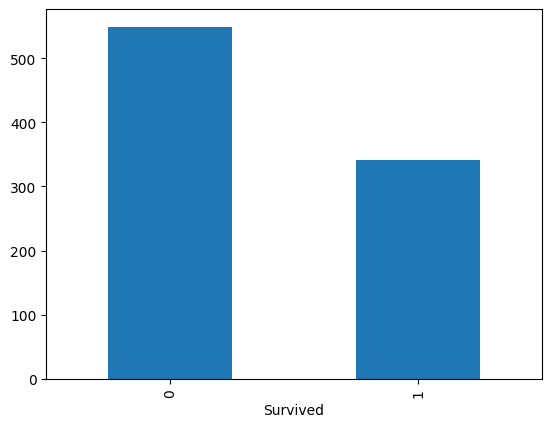

In [18]:
sobreviventes.plot(kind='bar')

In [9]:
df.groupby("Sex")["Survived"].mean()

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

In [19]:
df.groupby("Sex")["Survived"].value_counts()

Sex     Survived
female  1           233
        0            81
male    0           468
        1           109
Name: count, dtype: int64

In [21]:
SexoSobreviventes = df.groupby("Sex")["Survived"].value_counts()

<Axes: xlabel='Sex,Survived'>

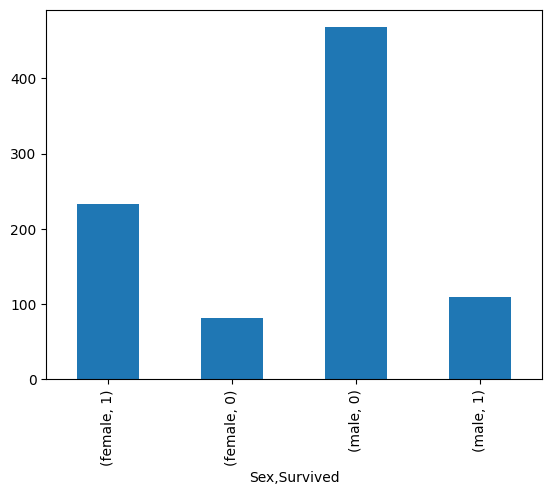

In [22]:
SexoSobreviventes.plot(kind='bar')

In [10]:
df.groupby("Pclass")["Survived"].mean()

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

In [23]:
df.groupby("Pclass")["Survived"].value_counts()

Pclass  Survived
1       1           136
        0            80
2       0            97
        1            87
3       0           372
        1           119
Name: count, dtype: int64

In [24]:
ClasseSobreviventes = df.groupby("Pclass")["Survived"].value_counts()

<Axes: xlabel='Pclass,Survived'>

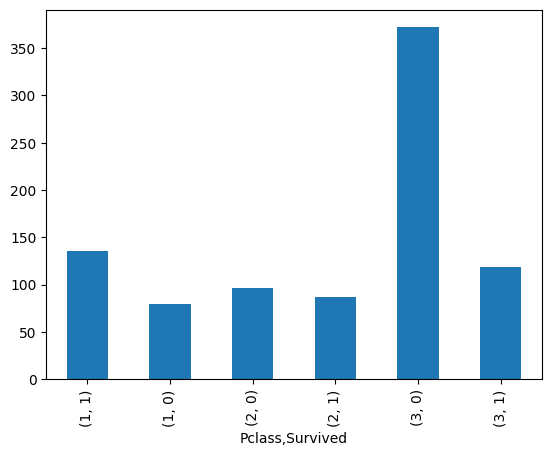

In [25]:
ClasseSobreviventes.plot(kind='bar')

In [11]:
df["Sex"].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [26]:
Sexo = df["Sex"].value_counts()

<Axes: xlabel='Sex'>

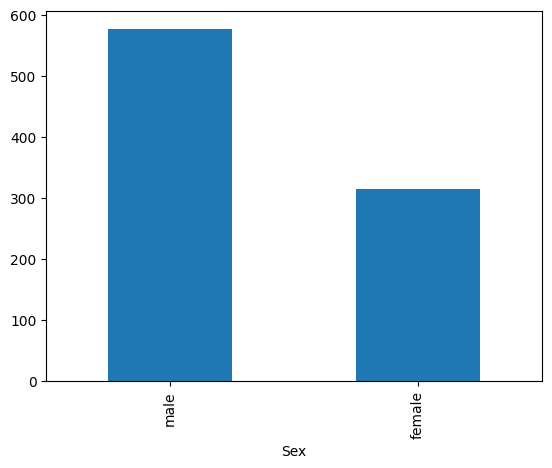

In [27]:
Sexo.plot(kind='bar')

In [12]:
df["Pclass"].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

In [28]:
Classe = df["Pclass"].value_counts()

<Axes: xlabel='Pclass'>

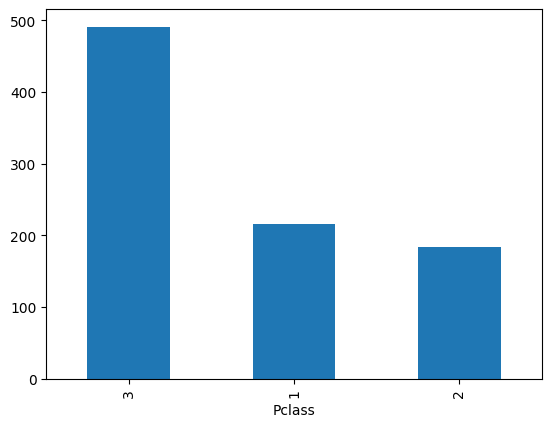

In [29]:
Classe.plot(kind='bar')

In [13]:
df["Age"].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [32]:
df["Crianca"] = df["Age"] < 18

In [33]:
df.groupby("Crianca")["Survived"].mean()

Crianca
False    0.361183
True     0.539823
Name: Survived, dtype: float64

In [34]:
df.groupby("Crianca")["Survived"].value_counts()

Crianca  Survived
False    0           497
         1           281
True     1            61
         0            52
Name: count, dtype: int64

In [35]:
CriancaSobrevivente = df.groupby("Crianca")["Survived"].value_counts()

<Axes: xlabel='Crianca,Survived'>

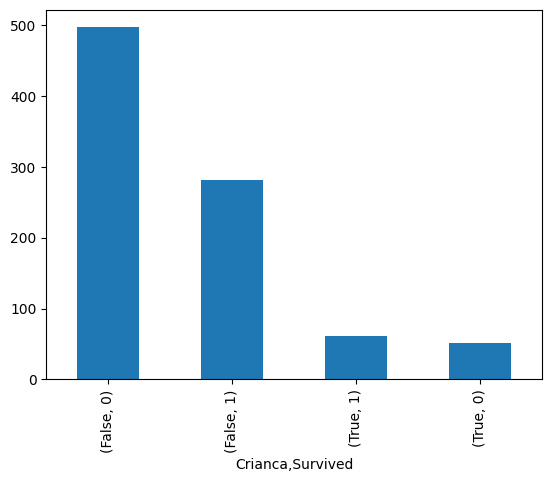

In [36]:
CriancaSobrevivente.plot(kind='bar')

In [37]:
df["Crianca"].value_counts(dropna=False)

Crianca
False    778
True     113
Name: count, dtype: int64

In [18]:
df.groupby(['Sex', 'Crianca'])['Survived'].mean()

Sex     Crianca
female  False      0.752896
        True       0.690909
male    False      0.165703
        True       0.396552
Name: Survived, dtype: float64

In [38]:
df.groupby(['Sex', 'Crianca'])['Survived'].value_counts()

Sex     Crianca  Survived
female  False    1           195
                 0            64
        True     1            38
                 0            17
male    False    0           433
                 1            86
        True     0            35
                 1            23
Name: count, dtype: int64

In [39]:
SexoCriancaSobrevivente = df.groupby(['Sex', 'Crianca'])['Survived'].value_counts()

<Axes: xlabel='Sex,Crianca,Survived'>

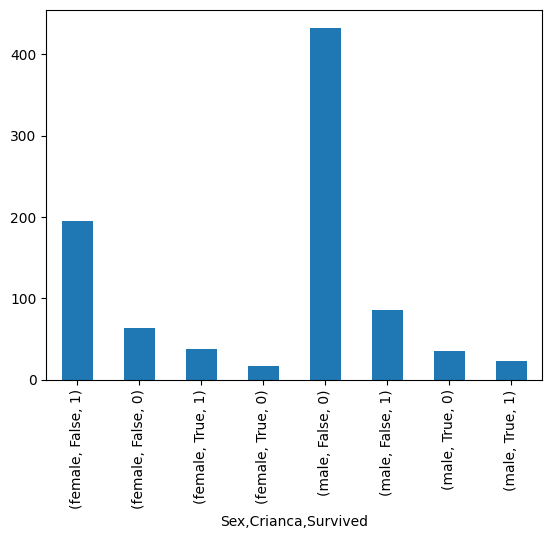

In [40]:
SexoCriancaSobrevivente.plot(kind='bar')

In [19]:
df.groupby(['Sex', 'Crianca']).size()

Sex     Crianca
female  False      259
        True        55
male    False      519
        True        58
dtype: int64

In [20]:
df.groupby(['Pclass', 'Crianca'])['Survived'].mean()

Pclass  Crianca
1       False      0.612745
        True       0.916667
2       False      0.409938
        True       0.913043
3       False      0.217918
        True       0.371795
Name: Survived, dtype: float64

In [41]:
df.groupby(['Pclass', 'Crianca'])['Survived'].value_counts()

Pclass  Crianca  Survived
1       False    1           125
                 0            79
        True     1            11
                 0             1
2       False    0            95
                 1            66
        True     1            21
                 0             2
3       False    0           323
                 1            90
        True     0            49
                 1            29
Name: count, dtype: int64

In [42]:
ClasseCriancaSobrevivente = df.groupby(['Pclass', 'Crianca'])['Survived'].value_counts()

<Axes: xlabel='Pclass,Crianca,Survived'>

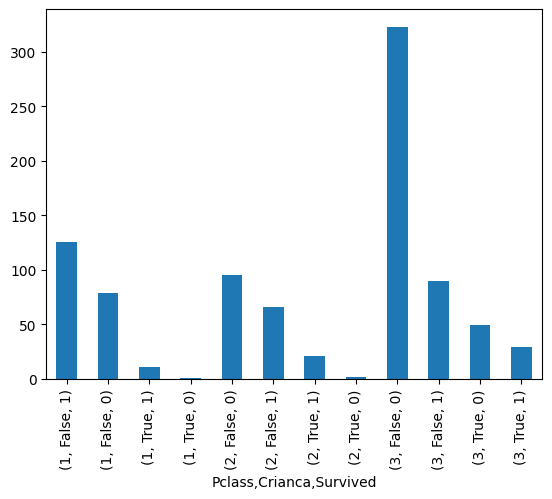

In [43]:
ClasseCriancaSobrevivente.plot(kind='bar')

In [21]:
df.groupby(['Pclass', 'Crianca']).size()

Pclass  Crianca
1       False      204
        True        12
2       False      161
        True        23
3       False      413
        True        78
dtype: int64